# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


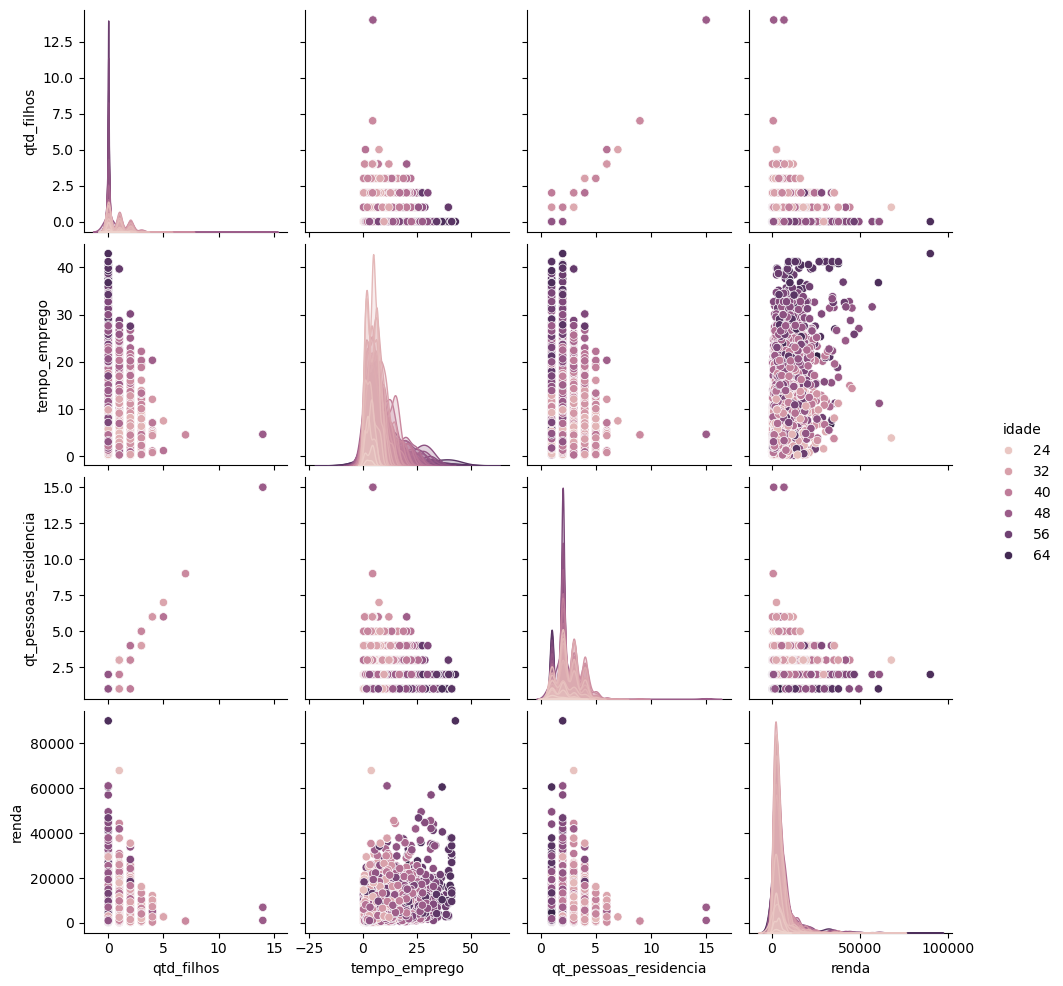

<Figure size 800x800 with 0 Axes>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prev_renda = pd.read_csv('previsao_de_renda.csv')
var_quant = prev_renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].copy()
sns.pairplot(var_quant, hue='idade')
plt.figure(figsize=(8, 8))
var_quant.corr()

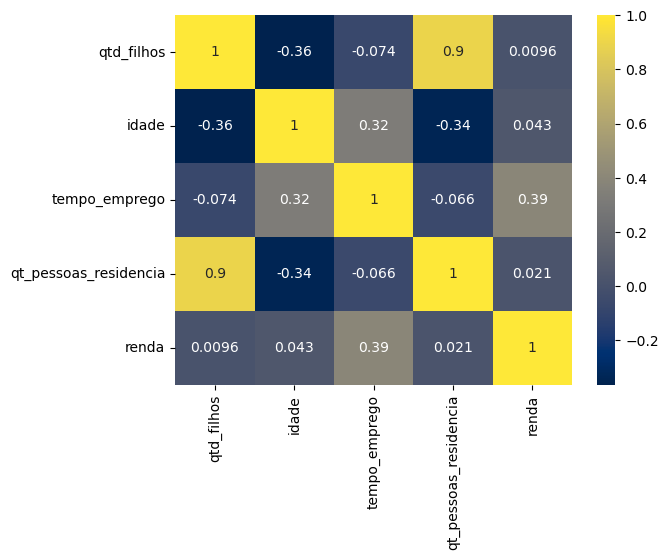

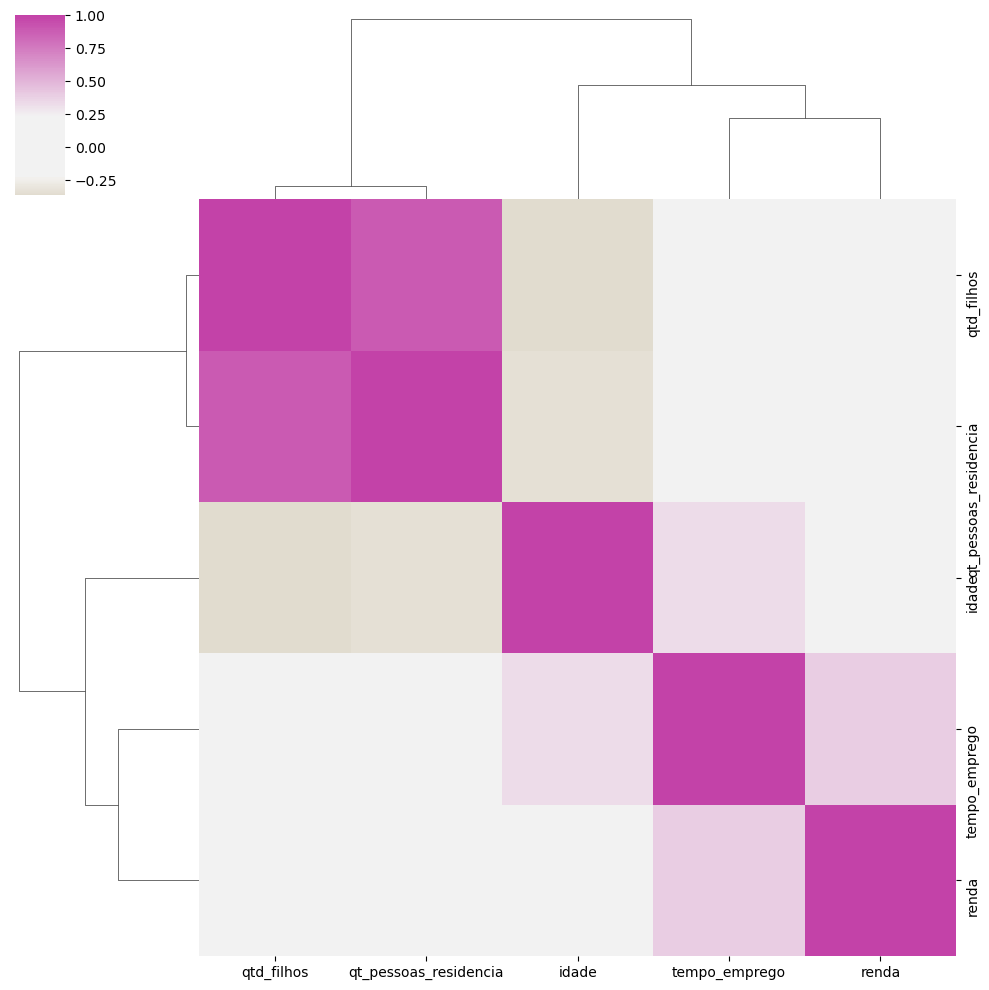

In [160]:
correlacao = var_quant.corr()
sns.heatmap(correlacao, annot=True, cmap='cividis')
cmap = sns.diverging_palette(h_neg=425, h_pos=322, as_cmap=True, sep=60, center='light')
sns.clustermap(correlacao, figsize=(10,10), center=0, cmap=cmap)
plt.show()

### 1 - Visualizei um certo padrão nas comparações de Renda, Tempo de emprego e Qt de pessoas: quanto menos filhos ou pessoas na residencia, há um aumento na renda e no tempo de emprego.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

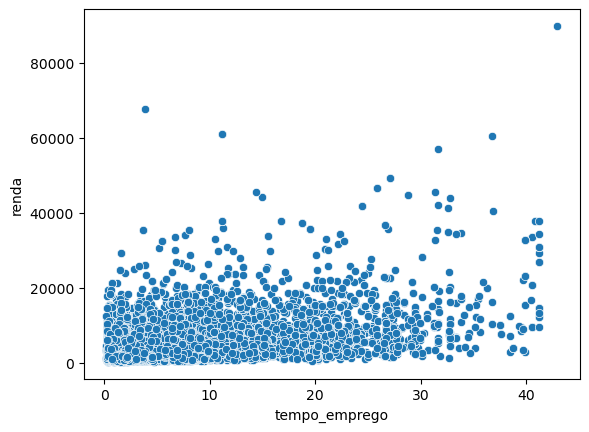

In [127]:
prev_renda.head()
rel_renda = prev_renda[['renda', 'tempo_emprego', 'idade']].copy()
sns.scatterplot(x=rel_renda['tempo_emprego'], y=rel_renda['renda'], data=rel_renda)

<Axes: xlabel='idade', ylabel='renda'>

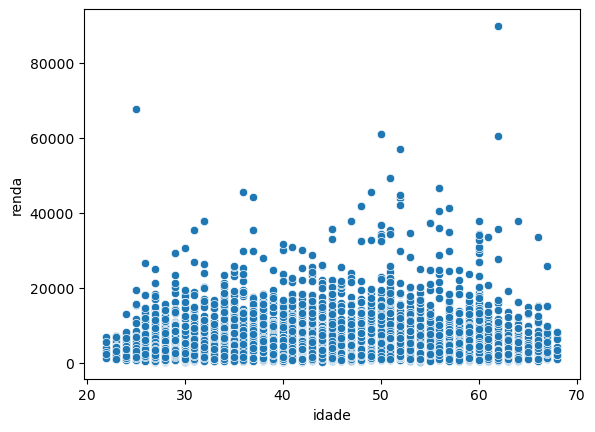

In [125]:
sns.scatterplot(x=rel_renda['idade'], y=rel_renda['renda'], data=rel_renda)

3) Na su aopinião, há outliers na variável renda?

<Axes: xlabel='tempo_emprego', ylabel='renda'>

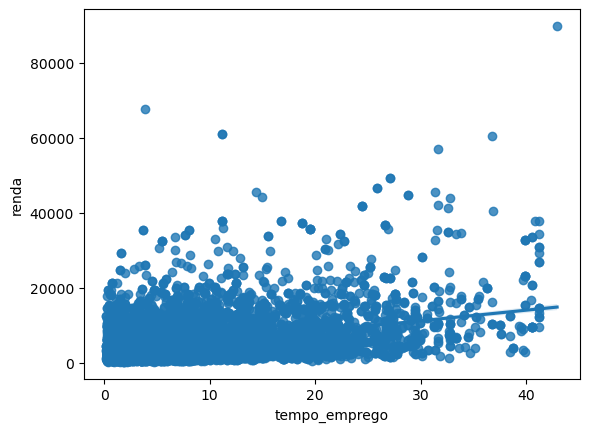

In [88]:
sns.regplot(y=rel_renda['renda'], x=rel_renda['tempo_emprego'])

<Axes: ylabel='renda'>

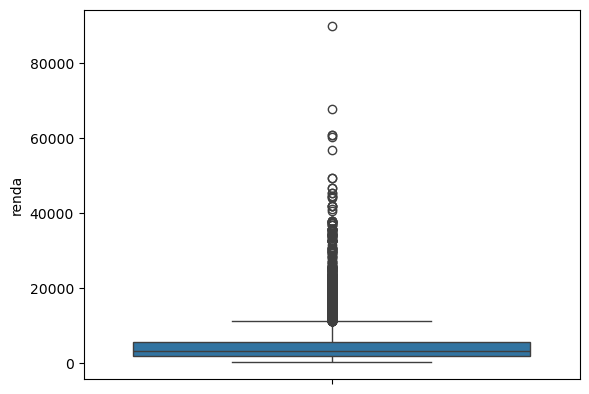

In [135]:
sns.boxplot(rel_renda['renda'])

### 3 - Há de fato alguns outliers na variavel Renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

         renda  tempo_emprego  idade  renda_log
0      3369.24       3.575342     36   8.122442
1      6096.14       0.860274     42   8.715411
2      5658.98       8.065753     31   8.640999
3      7246.69       1.208219     50   8.888300
4      4017.37      13.873973     52   8.298383
...        ...            ...    ...        ...
14995  1193.29       2.046575     37   7.084469
14996  2519.18      12.079452     30   7.831689
14997  1586.85       2.161644     40   7.369506
14998  6975.39       3.295890     47   8.850144
14999   993.86       3.049315     50   6.901596

[15000 rows x 4 columns]


<Axes: xlabel='tempo_emprego', ylabel='renda_log'>

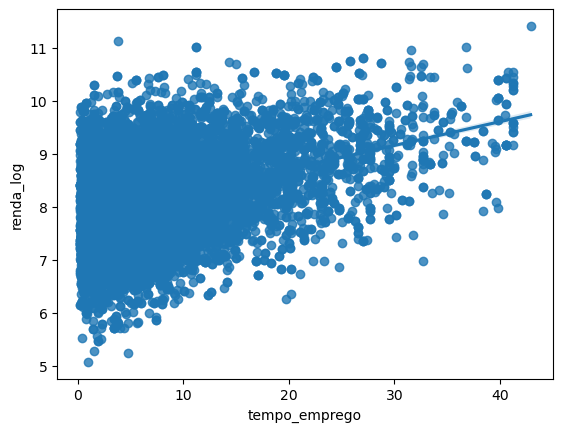

In [139]:
renda_log = rel_renda.copy()
renda_log['renda_log'] = np.log(renda_log['renda'])
print(renda_log)
sns.regplot(y=renda_log['renda_log'], x=renda_log['tempo_emprego'])

<Axes: xlabel='idade', ylabel='renda_log'>

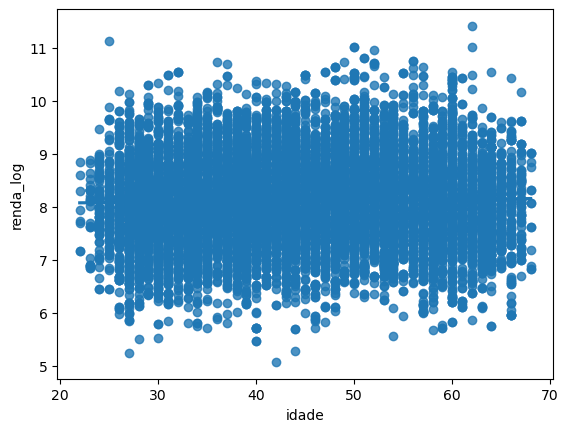

In [141]:
sns.regplot(y=renda_log['renda_log'], x=renda_log['idade'])

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

### 5 - Nos dois casos a aplicação do log facilitou a analise embora seja mais nitido no primeiro caso melhorando o agrupamento diminuindo os outliers